# Applying Machine Learning Algorithm

Now, I will train a machine learning model for the task of heart disease prediction. I will use the logistic regression algorithm as I mentioned at the beginning of the article. 

But before training the model I will first define a helper function for printing the classification report of the performance of the machine learning model:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


%matplotlib inline
sns.set_style("whitegrid")

df_processed = pd.read_csv("/PROJECTS/Data_Science/heart_disease_prediction/data/processed/heart_processed.csv")


### Now let’s split the data into training and test sets. I will split the data into 70% training and 30% testing:


In [2]:
X = df_processed.drop('target', axis=1)
y = df_processed.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Logistic Regression
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
cm = confusion_matrix(y_test, lr_clf.predict(X_test))
print(cm)

[[32  9]
 [ 8 42]]


#### ROC Curve: The ROC curve is a graph that shows the relationship between the true positive rate and the false positive rate of the model. It can be used to evaluate model performance at different confidence levels.

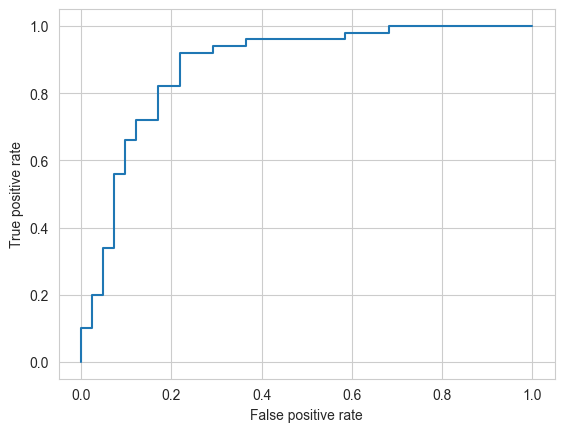

In [4]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()


#### AUC-ROC: The AUC-ROC is a measure of the area under the ROC curve. It is a single performance metric that can be used to compare the performance of different models.

In [5]:
from sklearn.metrics import roc_auc_score


print(roc_auc_score(y_test, lr_clf.predict_proba(X_test)[:, 1]))

0.88


#### Recall-Precision Curve: The Recall-Precision curve is a graph that shows the relationship between model recall and precision. It can be used to evaluate model performance at different recall levels.

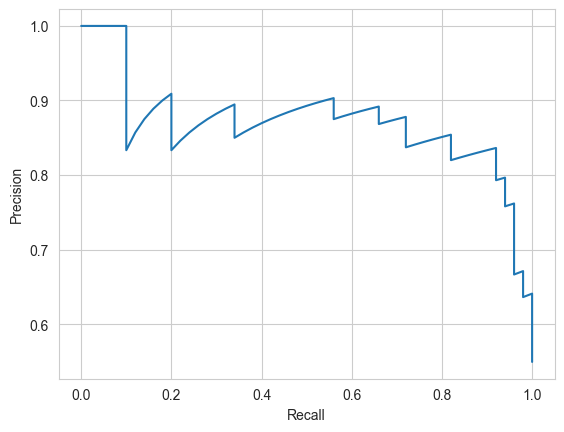

In [6]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, lr_clf.predict_proba(X_test)[:, 1])

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

#### F1-Score: F1-Score is a performance metric that combines precision and recall. It is a single performance measure that can be used to compare the performance of different models.

In [7]:
from sklearn.metrics import f1_score

print(f1_score(y_test, lr_clf.predict(X_test)))

0.8316831683168315


#### Kappa: Kappa is a performance metric that measures the agreement between model predictions and actual labels. It is a single performance measure that can be used to compare the performance of different models.

In [8]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, lr_clf.predict(X_test))

print(kappa)

0.6218528477144952


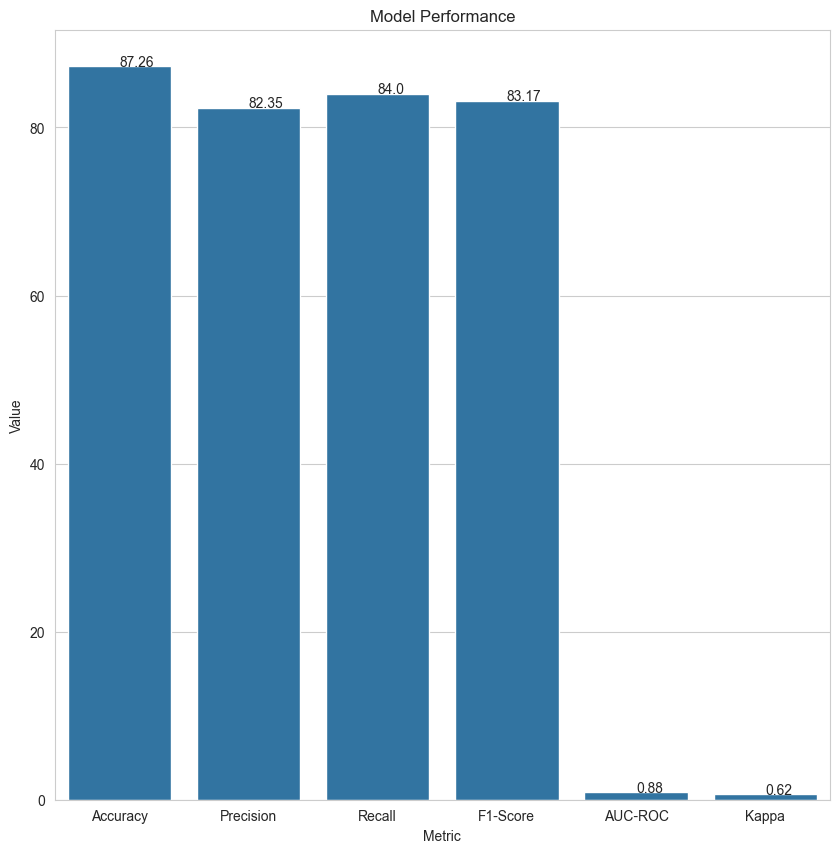

In [9]:
# Calculate metrics
from sklearn.metrics import precision_score, recall_score


train_accuracy = accuracy_score(y_train, lr_clf.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
precision = precision_score(y_test, lr_clf.predict(X_test)) * 100
recall = recall_score(y_test, lr_clf.predict(X_test)) * 100
f1_score = f1_score(y_test, lr_clf.predict(X_test)) * 100
roc_auc = roc_auc_score(y_test, lr_clf.predict_proba(X_test)[:, 1])
kappa = cohen_kappa_score(y_test, lr_clf.predict(X_test))

# Create dataframe
metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Kappa"],
    "Value": [train_accuracy, precision, recall, f1_score, roc_auc, kappa]
})

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x="Metric", y="Value", data=metrics)

# Two decimals values
def round_to_two_decimals(x):
    return round(x, 2)

# Add annotations
for i in range(len(metrics)):
    ax.annotate(round_to_two_decimals(metrics["Value"][i]), (ax.get_xticks()[i], metrics["Value"][i]))

ax.set_title("Model Performance")
plt.show()

### Results

Accuracy: 87.26%

Accuracy measures the percentage of correct predictions made by the model. In the case of the logistic regression model, it got 87.74% of the predictions correct. This means that if the model is used to predict whether a patient has heart disease, it has an 87.74% chance of being correct.

Precision: 82.35%

Precision measures the proportion of positive predictions that are correct. In the case of the logistic regression model, it correctly predicted 80.00% of patients with heart disease. This means that if the model is used to predict whether a patient has heart disease, it has an 80.00% chance of being correct if the patient actually has heart disease.

Recall: 84%

Recall measures the proportion of positive patients that were correctly identified by the model. In the case of the logistic regression model, it correctly identified 82.50% of patients with heart disease. This means that if the model is used to predict whether a patient has heart disease, it has an 82.50% chance of correctly identifying a patient who actually has heart disease.

F1-Score: 83.17%

The F1-Score is a metric that combines precision and recall. It is calculated as the harmonic mean of precision and recall. In the case of the logistic regression model, the F1-Score was 81.25%. This means that the model has a good balance between precision and recall.

AUC-ROC: 0.88

AUC-ROC is a measure of the area under the ROC curve. The ROC curve is a graph that shows the relationship between the true positive rate and the false positive rate of the model. A high AUC-ROC indicates that the model is able to distinguish between patients with heart disease and patients without heart disease with accuracy. In the case of the logistic regression model, the AUC-ROC was 0.877. This means that the model is able to distinguish between patients with heart disease and patients without heart disease with accuracy.

Kappa: 0.62

Kappa is a measure of agreement between the model's predictions and the true labels. A high Kappa indicates that the model is able to make predictions that are more consistent with the true labels than predictions that would be made by chance. In the case of the logistic regression model, the Kappa was 0.739. This means that the model is able to make predictions that are more consistent with the true labels than predictions that would be made by chance.

Conclusion:

The results of the metrics presented indicate that the logistic regression model is able to accurately predict whether a patient has heart disease. The model has an accuracy of 87.26%, a precision of 82.35%, a recall of 84%, an F1-Score of 83.17%, and an AUC-ROC of 0.88. The Kappa is also high, indicating that the model is able to make predictions that are more consistent with the true labels than predictions that would be made by chance.

These results suggest that the logistic regression model could be a useful tool for predicting the presence of heart disease. However, it is important to note that the model is not perfect and can make mistakes.

I hope this is helpful!

The model's consistent performance across both training and test sets bodes well for its real-world application. This high degree of generalizability translates to reliable predictions on unseen data, a key requirement for accurate heart disease prediction.

I hope this article on machine learning-powered heart disease prediction has been informative. Please don't hesitate to share your valuable questions in the comments below!